# Popular Machine Learning Regression Algorithms on Ames Housing Dataset

# Data Overview

Source - [Kaggle Ames Housing Data Set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

File descriptions -
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column   names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

Data fields - 
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


# Importing Libraries

In [2]:
import sys
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}". format(np.__version__))

import scipy as sp
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

import random
import time

import warnings
warnings.filterwarnings('ignore')

Python version: 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
pandas version: 1.1.1
matplotlib version: 3.2.1
NumPy version: 1.18.5
SciPy version: 1.4.1
IPython version: 7.13.0
scikit-learn version: 0.23.2


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

In [4]:
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn import tree

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# Reading Data

In [5]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [6]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [7]:
f = open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [8]:
print('Train Dataset')
print('\n','-'*100,'\n')
print(train.sample(20))
print('\n','-'*100,'\n')
print(train.shape)
print('\n','-'*190,'\n')
print(train.info())
print('\n','-'*100,'\n')
print(train.describe())
print('\n','-'*100,'\n')

print('\n\n','*'*100,'\n\n')

print('Test Dataset')
print('\n','-'*100,'\n')
print(test.sample(20))
print('\n','-'*100,'\n')
print(test.shape)
print('\n','-'*100,'\n')
print(test.info())
print('\n','-'*100,'\n')
print(test.describe())
print('\n','-'*100,'\n')

Train Dataset

 ---------------------------------------------------------------------------------------------------- 

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
989    990          60       FV         65.0     8125   Pave   NaN      Reg   
418    419          50       RL         60.0     8160   Pave   NaN      Reg   
850    851         120       RM         36.0     4435   Pave   NaN      Reg   
525    526          20       FV         62.0     7500   Pave  Pave      Reg   
1312  1313          60       RL          NaN     9572   Pave   NaN      IR1   
507    508          20       FV         75.0     7862   Pave   NaN      IR1   
1237  1238          60       RL         41.0    12393   Pave   NaN      IR2   
935    936          30       RL         52.0     5825   Pave   NaN      IR1   
461    462          70       RL         60.0     7200   Pave   NaN      Reg   
1065  1066          60       RL         80.0    14000   Pave   NaN      Reg   
424    425  

In [9]:
data = [train, test]

# Data Pre-Processing and Exploration

In [10]:
for a in data:
    print(a.isnull().sum())
    print('\n\n','*'*100,'\n\n')

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
for a in data:
    a['BsmtQual'].fillna('None', inplace = True)
    a['BsmtCond'].fillna('None', inplace = True)
    a['BsmtExposure'].fillna('None', inplace = True)
    a['BsmtFinType1'].fillna('None', inplace = True)
    a['BsmtFinType2'].fillna('None', inplace = True)
    a['FireplaceQu'].fillna('None', inplace = True)
    a['GarageType'].fillna('None', inplace = True)
    a['GarageFinish'].fillna('None', inplace = True)
    a['GarageQual'].fillna('None', inplace = True)
    a['GarageCond'].fillna('None', inplace = True)
    a['PoolQC'].fillna('None', inplace = True)
    a['Fence'].fillna('None', inplace = True)
    a['MiscFeature'].fillna('None', inplace = True)
    a['Alley'].fillna('None', inplace = True)

In [12]:
for a in data:
    a["LotFrontage"] = a.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [13]:
for a in data:
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        a[col] = a[col].fillna(0)

In [14]:
for a in data:
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        a[col] = a[col].fillna(0)

In [15]:
for a in data:
    a["MasVnrType"] = a["MasVnrType"].fillna("None")
    a["MasVnrArea"] = a["MasVnrArea"].fillna(0)

In [16]:
for a in data:
    a['MSZoning'] = a['MSZoning'].fillna(a['MSZoning'].mode()[0])

In [17]:
for a in data:
    a["Functional"] = a["Functional"].fillna("Typ")

In [18]:
for a in data:
    a['Electrical'] = a['Electrical'].fillna(a['Electrical'].mode()[0])

In [19]:
for a in data:    
    a['KitchenQual'] = a['KitchenQual'].fillna(a['KitchenQual'].mode()[0])

In [20]:
for a in data:
    a['Exterior1st'] = a['Exterior1st'].fillna(a['Exterior1st'].mode()[0])
    a['Exterior2nd'] = a['Exterior2nd'].fillna(a['Exterior2nd'].mode()[0])

In [21]:
for a in data:
    a['SaleType'] = a['SaleType'].fillna(a['SaleType'].mode()[0])

In [22]:
for a in data:
    a['MSSubClass'] = a['MSSubClass'].fillna("None")

In [23]:
train = train.drop(['Utilities'], axis=1)
test = test.drop(['Utilities'], axis=1)

In [24]:
print(train.isnull().sum())
print('*****************************')
print(test.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [25]:
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

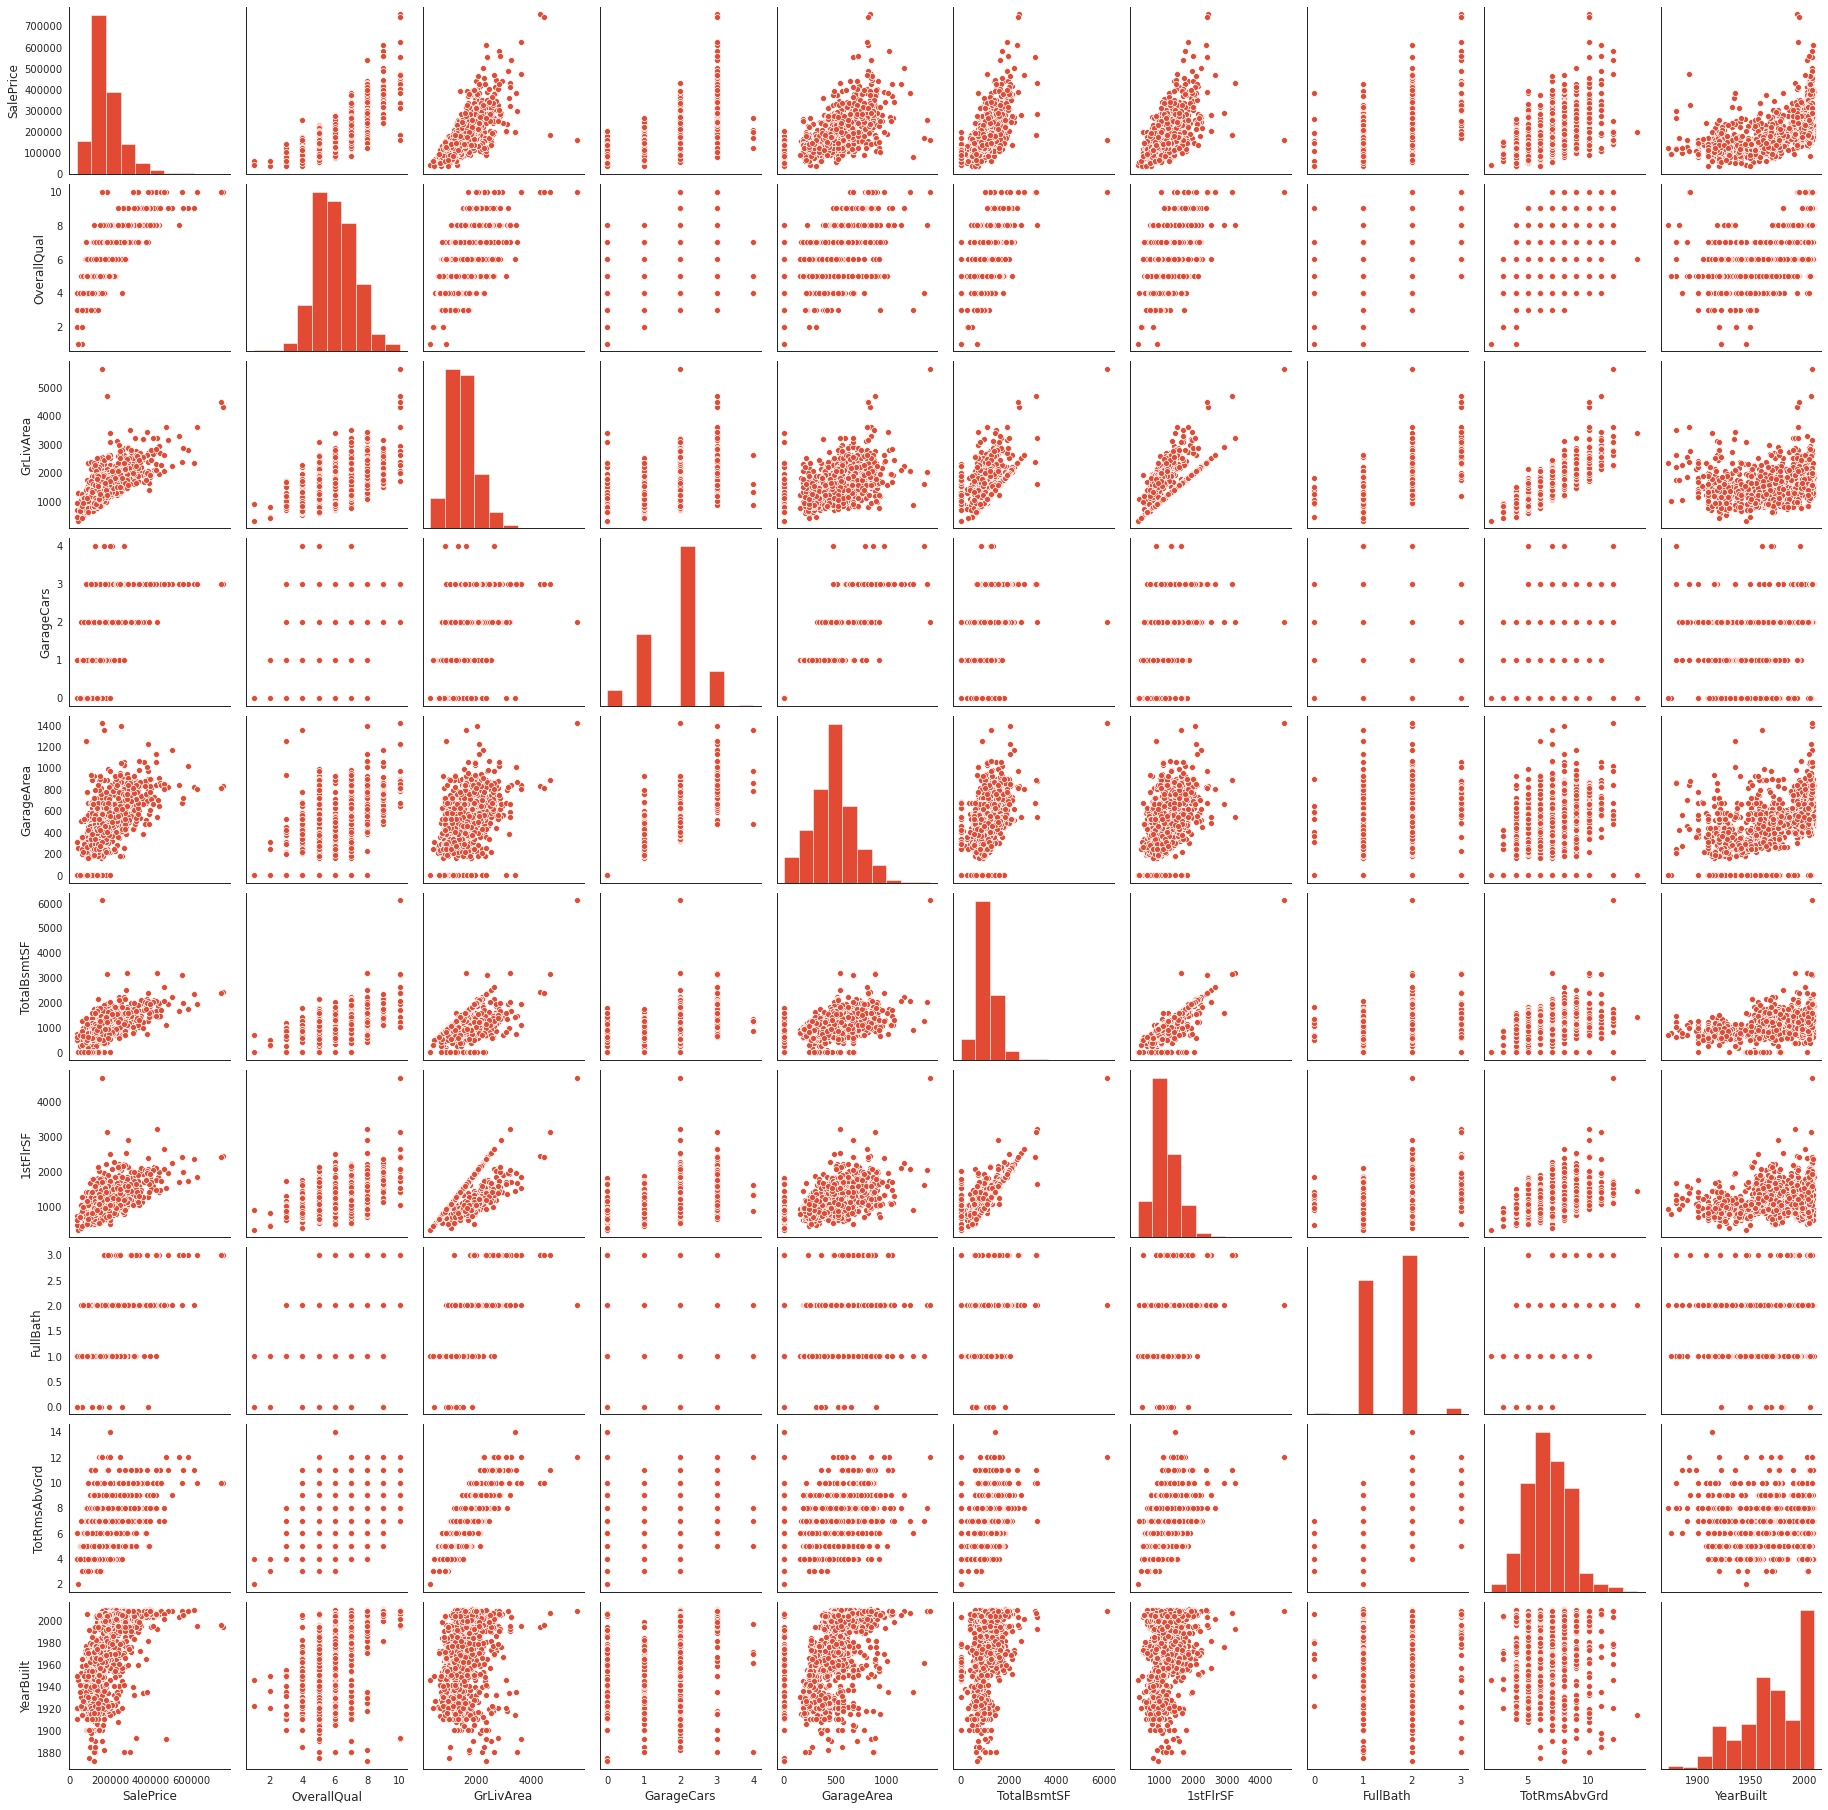

In [26]:
_ = sns.pairplot(train[cols],kind='scatter')

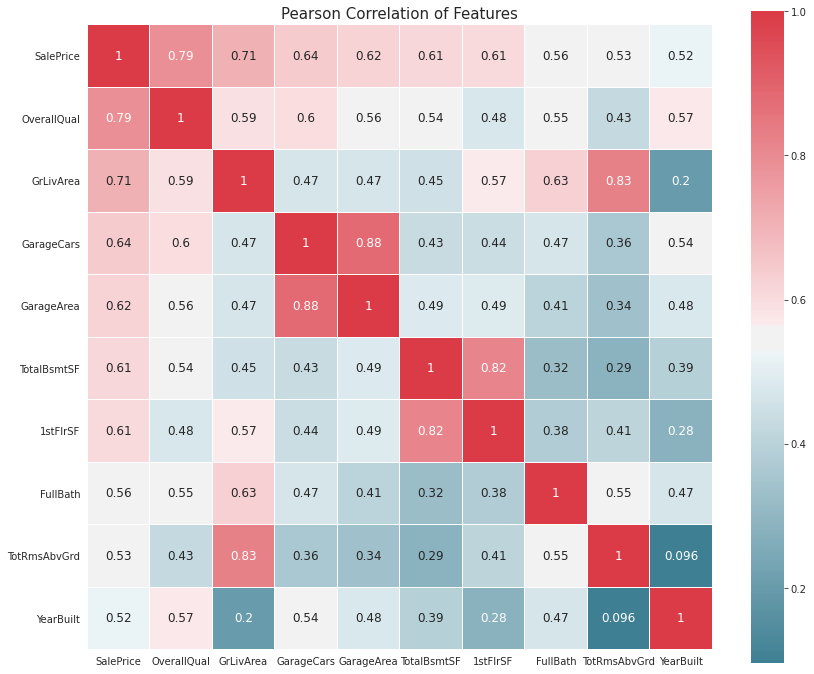

In [27]:
_ , ax = plt.subplots(figsize =(14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)    
asd = sns.heatmap(train[cols].corr(),cmap = colormap,square=True,ax=ax,annot=True,linewidths=0.1,vmax=1.0, linecolor='white',annot_kws={'fontsize':12 }) 
plt.title('Pearson Correlation of Features', y=1.05, size=15)
asd.set_yticklabels(asd.get_yticklabels(), rotation=0)
plt.show()

In [28]:
train.corr().sort_values(by='SalePrice', ascending = False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.349876,0.263843,0.790982,-0.077856,0.522897,0.507101,0.472614,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.261366,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.385190,0.263116,0.593007,-0.079686,0.199010,0.287389,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.162543,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.281393,0.154871,0.600671,-0.185758,0.537850,0.420622,0.361945,0.224054,-0.038264,0.214175,0.434585,0.439317,0.183926,-0.094480,0.467247,0.131881,-0.020891,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,0.598005,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.339085,0.180403,0.562022,-0.151521,0.478954,0.371600,0.370884,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,0.179189,-0.024536,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.560783,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.381038,0.260833,0.537808,-0.171098,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.176359,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.434109,0.299475,0.476224,-0.144203,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.166642,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.186561,0.126031,0.550600,-0.194149,0.468271,0.439046,0.272999,0.058543,-0.076444,0.288886,0.323722,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.137464,0.469672,0.405656,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.332619,0.190015,0.427452,-0.057583,0.095589,0.191740,0.279568,0.044316,-0.035227,0.250647,0.285573,0.409516,0.616423,0.131185,0.825489,-0.053275,-0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.095607,0.362289,0.337822,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398

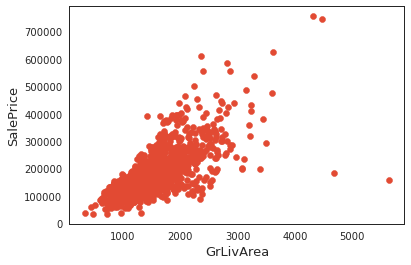

In [29]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [30]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

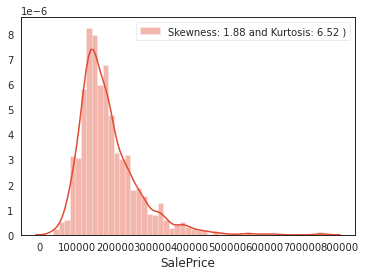

In [31]:
sns.distplot(train['SalePrice'])
plt.legend(['Skewness: {:.2f} and Kurtosis: {:.2f} )'.format(train['SalePrice'].skew(), train['SalePrice'].kurt())],
            loc='best')

In [32]:
train["SalePrice"] = np.log1p(train["SalePrice"])

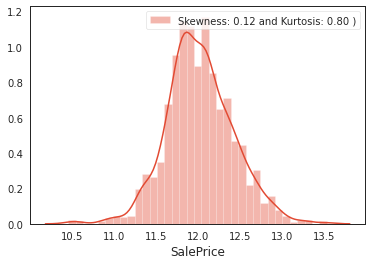

In [33]:
sns.distplot(train['SalePrice'])
plt.legend(['Skewness: {:.2f} and Kurtosis: {:.2f} )'.format(train['SalePrice'].skew(), train['SalePrice'].kurt())],
            loc='best')

In [34]:
train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalArea'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [35]:
label_encod = ['MSZoning','Street','Alley','LotConfig','Condition1','BldgType','HouseStyle','SaleType','LotShape','LandContour','ExterQual','BsmtQual','BsmtCond','CentralAir','HeatingQC','Functional','PavedDrive','Fence']

In [36]:
dummy_encod = ['Neighborhood']

In [37]:
imp_f_n = ['YearRemodAdd','MasVnrArea','TotalArea','GarageArea']

In [38]:
imp_f_c = ['FullBath','TotRmsAbvGrd','Fireplaces','OverallQual']

In [39]:
imp_f_t = imp_f_n + imp_f_c + ['SalePrice']

In [40]:
train[imp_f_t].corr().sort_values(by='SalePrice', ascending = False)

,YearRemodAdd,MasVnrArea,TotalArea,GarageArea,FullBath,TotRmsAbvGrd,Fireplaces,OverallQual,SalePrice
SalePrice,0.565992,0.430570,0.825326,0.656129,0.595899,0.537702,0.491998,0.821405,1.000000
TotalArea,0.350162,0.428028,1.000000,0.558331,0.594538,0.678561,0.476840,0.677325,0.825326
OverallQual,0.549827,0.398785,0.677325,0.557230,0.548420,0.420621,0.392472,1.000000,0.821405
GarageArea,0.370000,0.360786,0.558331,1.000000,0.404076,0.328714,0.260455,0.557230,0.656129
FullBath,0.437927,0.267662,0.594538,0.404076,1.000000,0.553038,0.242375,0.548420,0.595899
YearRemodAdd,1.000000,0.172590,0.350162,0.370000,0.437927,0.188418,0.109898,0.549827,0.565992
TotRmsAbvGrd,0.188418,0.268116,0.678561,0.328714,0.553038,1.000000,0.320037,0.420621,0.537702
Fireplaces,0.109898,0.239226,0.476840,0.260455,0.242375,0.320037,1.000000,0.392472,0.491998
MasVnrArea,0.172590,1.000000,0.428028,0.360786,0.267662,0.268116,0.239226,0.398785,0.430570


In [41]:
train_Id = train['Id']
test_Id = test['Id']
train_saleprice = train['SalePrice']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train.drop("SalePrice", axis = 1, inplace = True)

In [42]:
final_cols = label_encod + dummy_encod + imp_f_n + imp_f_c
final_train = train[final_cols]
final_test = test[final_cols]
data = [final_train, final_test]

In [43]:
scaler = StandardScaler()

for a in data:
    for b in imp_f_n:
        scaler.fit(a[[b]])
        a[b] = scaler.transform(a[[b]])

In [44]:
for a in data:
    for c in label_encod:
        lbl = LabelEncoder()
        lbl.fit(list(a[c].values))
        a[c] = lbl.transform(list(a[c].values))

In [45]:
final_train = pd.get_dummies(final_train, columns=dummy_encod, drop_first=True, prefix='Neighbor')
final_test = pd.get_dummies(final_test, columns=dummy_encod, drop_first=True, prefix='Neighbor')

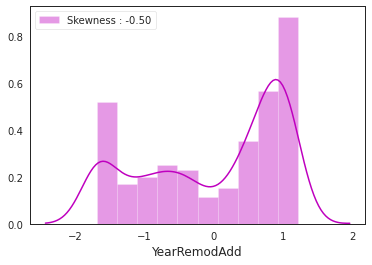

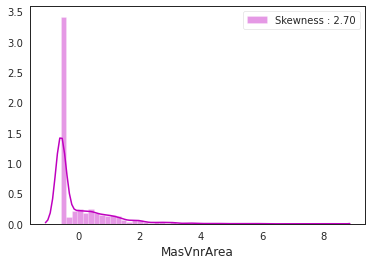

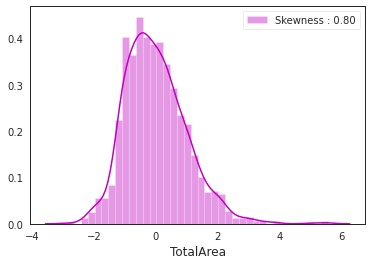

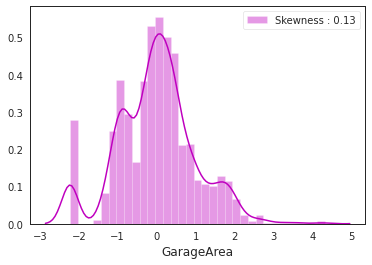

xxxxxxxxxxxxxxxxxxxx


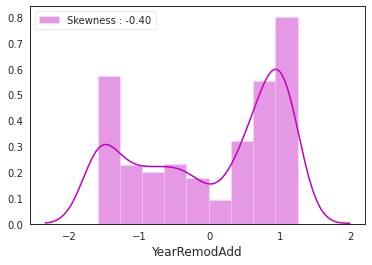

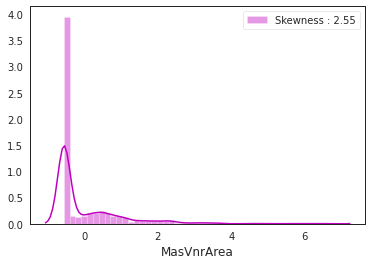

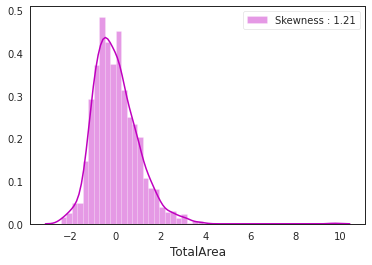

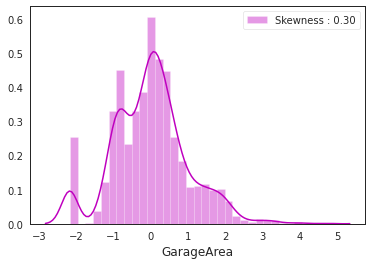

xxxxxxxxxxxxxxxxxxxx


<Figure size 432x288 with 0 Axes>

In [46]:
for a in data:
    for b in imp_f_n:
            g = sns.distplot(a[b], color="m", label="Skewness : %.2f"%(a[b].skew()))
            g = g.legend(loc="best")
            plt.show()
            plt.figure()
    print(20*'x') 

In [47]:
skew_cols = ['MasVnrArea', 'TotalArea']
for b in skew_cols:
    train[b] = train[b].map(lambda i: np.log(i) if i > 0 else 0)
for b in skew_cols:
    test[b] = test[b].map(lambda i: np.log(i) if i > 0 else 0)

In [48]:
print('Train Dataset')
print('\n','-'*100,'\n')
print(final_train.sample(20))
print('\n','-'*100,'\n')
print(final_train.shape)
print('\n','-'*190,'\n')
print(final_train.info())
print('\n','-'*100,'\n')
print(final_train.describe())
print('\n','-'*100,'\n')

print('\n\n','*'*100,'\n\n')

print('Test Dataset')
print('\n','-'*100,'\n')
print(final_test.sample(20))
print('\n','-'*100,'\n')
print(final_test.shape)
print('\n','-'*100,'\n')
print(final_test.info())
print('\n','-'*100,'\n')
print(final_test.describe())
print('\n','-'*100,'\n')

Train Dataset

 ---------------------------------------------------------------------------------------------------- 

      MSZoning  Street  Alley  LotConfig  Condition1  BldgType  HouseStyle  \
1184         3       0      1          4           2         0           2   
1084         3       1      1          0           2         0           5   
692          3       1      1          4           2         0           5   
325          4       1      1          4           5         0           1   
982          3       1      1          4           2         0           2   
1163         3       1      1          4           1         2           6   
1264         2       1      1          4           2         4           2   
734          3       1      1          0           2         0           2   
986          4       1      1          0           1         0           0   
684          3       1      1          1           2         0           5   
880          3       1 

# ML Algorithms Modelling

In [49]:
MLA_compare = pd.DataFrame(columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA RMSE Score Mean'])
row_index = 0

In [50]:
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0)
    rmse= -cross_val_score(model, X_test, y_test, scoring="neg_root_mean_squared_error", cv = kf)
    return(rmse)

In [51]:
def fit_this(model):
    global row_index
    model.fit(X_train, y_train)
    asdf = model.predict(X_test)
    scored = rmsle_cv(algo)
    plt.scatter(y_test,asdf, color = 'green')
    plt.scatter(y_test,y_test, color = 'red', marker = '*')
    plt.xlabel('Actual Value', fontsize=13)
    plt.ylabel('Predicted Value', fontsize=13)
    plt.title(name)
    MLA_compare.loc[row_index, 'MLA Name'] = model.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = model.score(X_train, y_train)
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = model.score(X_test, y_test)
    MLA_compare.loc[row_index, 'MLA RMSE Score Mean'] = scored.mean()
    row_index+=1

In [52]:
X_train, X_test, y_train, y_test = train_test_split(final_train, train_saleprice, random_state=0)

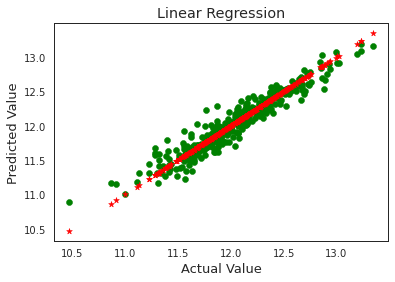

In [53]:
lr = LinearRegression()
algo = lr
name = 'Linear Regression'
fit_this(algo)

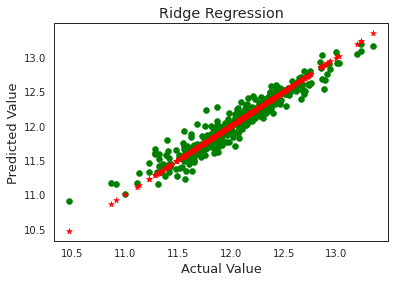

In [54]:
ridg = Ridge()
algo = ridg
name = 'Ridge Regression'
fit_this(algo)

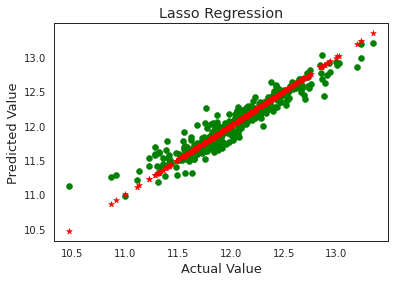

In [55]:
laso = Lasso(alpha = 0.005)
algo = laso
name = 'Lasso Regression'
fit_this(algo)

In [56]:
print("Number of features used: {} out of {} features".format(np.sum(algo.coef_ != 0),len(final_train.columns)))

Number of features used: 17 out of 50 features


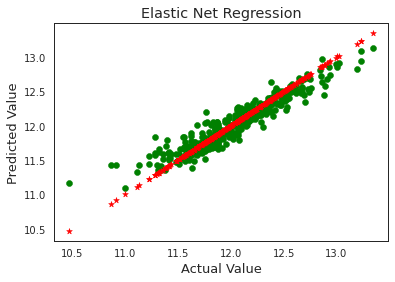

In [57]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.2)
algo = elastic_net
name = 'Elastic Net Regression'
fit_this(algo)

In [58]:
print("Number of features used: {} out of {} features".format(np.sum(algo.coef_ != 0),len(final_train.columns)))

Number of features used: 13 out of 50 features


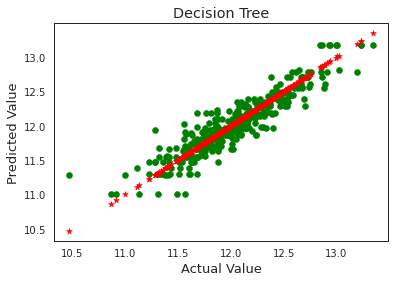

In [59]:
dtree = DecisionTreeRegressor(min_samples_leaf=10)
algo = dtree
name = 'Decision Tree'
fit_this(algo)

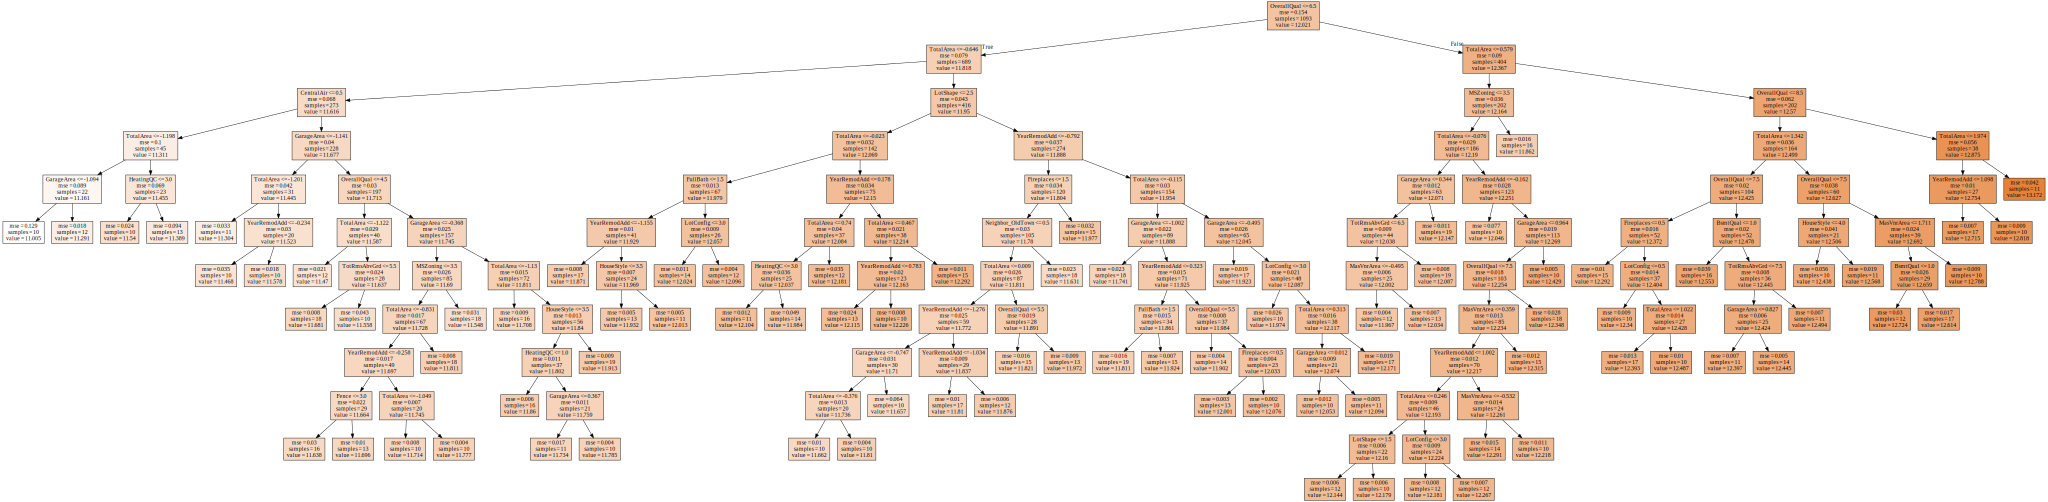

In [60]:
tree_plot = tree.export_graphviz(dtree, feature_names = final_train.columns, filled = True)
graph = graphviz.Source(tree_plot)  
graph

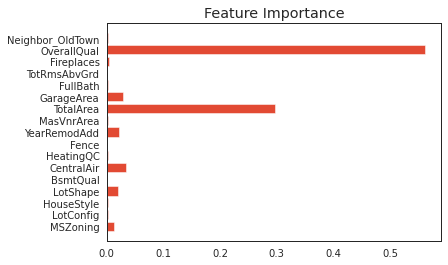

In [61]:
c = dtree.feature_importances_
a = final_train.columns[c.nonzero()]
c = c[c != 0]
_ = plt.barh(a, c)
_ = plt.title('Feature Importance')

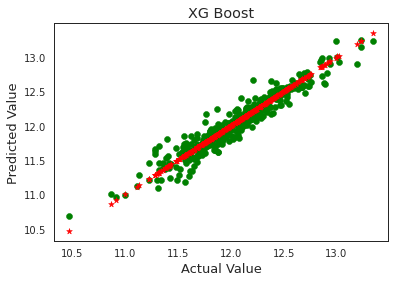

In [62]:
model_xgb = xgb.XGBRegressor(max_depth=2)
algo = model_xgb
name = 'XG Boost'
fit_this(algo)

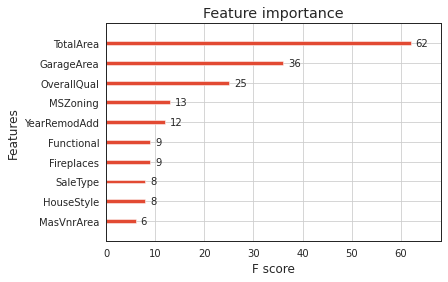

In [63]:
xgb.plot_importance(model_xgb,max_num_features=10)
plt.show()

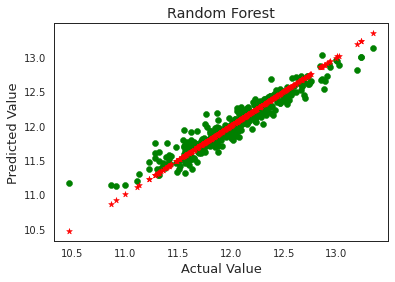

In [64]:
forest = RandomForestRegressor(n_estimators = 200,min_samples_split = 3, min_samples_leaf = 3, max_features = 20)
algo = forest
name = 'Random Forest'
fit_this(algo)

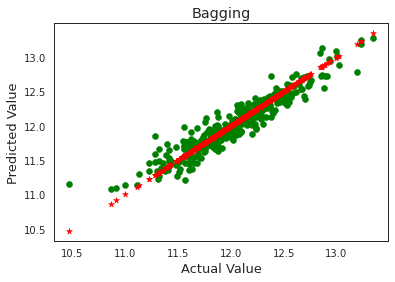

In [65]:
baggin = BaggingRegressor(DecisionTreeRegressor(min_samples_leaf=3), n_estimators = 100)
algo = baggin
name = 'Bagging'
fit_this(algo)

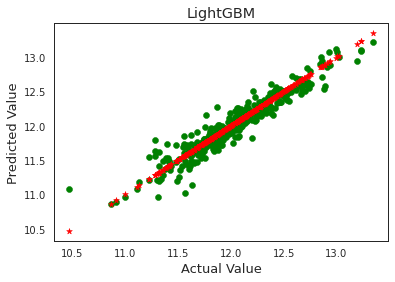

In [66]:
lgbm = LGBMRegressor(n_estimators = 200,max_depth = 3)
algo = lgbm
name = 'LightGBM'
fit_this(algo)

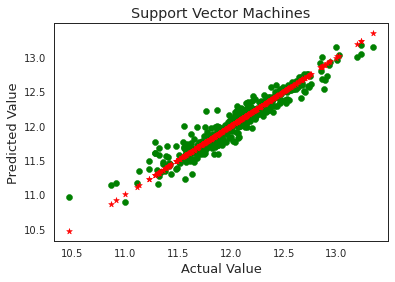

In [67]:
svmr = SVR(C = 4)
algo = svmr
name = 'Support Vector Machines'
fit_this(algo)

# Results

In [68]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA RMSE Score Mean
1,Ridge,0.892181,0.909678,0.137168
0,LinearRegression,0.892295,0.909499,0.137557
9,SVR,0.918887,0.908913,0.141036
6,RandomForestRegressor,0.942594,0.908652,0.144777
5,XGBRegressor,0.932964,0.90759,0.142687
8,LGBMRegressor,0.931591,0.901189,0.145564
2,Lasso,0.871257,0.900031,0.140856
7,BaggingRegressor,0.948968,0.895779,0.151407
3,ElasticNet,0.841193,0.880761,0.147376
4,DecisionTreeRegressor,0.882151,0.834845,0.198716


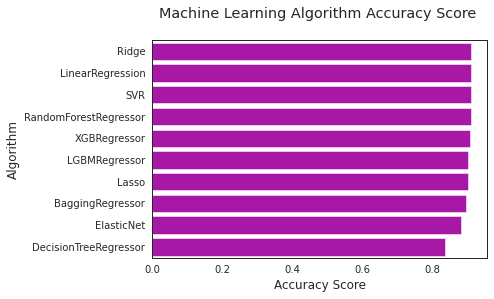

In [69]:
_ = sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

_ = plt.title('Machine Learning Algorithm Accuracy Score \n')
_ = plt.xlabel('Accuracy Score')
_ = plt.ylabel('Algorithm')

In [70]:
def blended_algo(X):
    return ((0.10 * laso.predict(X)) + \
            (0.20 * ridg.predict(X)) + \
            (0.20 * model_xgb.predict(X)) + \
            (0.10 * baggin.predict(X)) + \
            (0.20 * forest.predict(X)) + \
            (0.20 * svmr.predict(X)))

In [71]:
a = blended_algo(final_test)
a = np.expm1(a)